# Lematización

La lematización es un proceso donde se agrupan diferentes formas o inflecciones de una misma palabra. De esta manera esp posible analizarlas como una misma ocurrencia en vez de como palabras diferentes. Para lograr este objetivo se realiza un analisis morfológico de las palabras.

## Lematización VS Derivación

La derivación o stemming es un porceso donde un conjunto de palabtras es transformada en una formato más corto eliminando de esta manera las variaciones que la palabra tiene de acuerdo al contexto. Esto nos da como resultado lo que se denomina <b> palabra raíz </b>


In [1]:
import nltk
from nltk.stem import PorterStemmer

love = ["love", "loved", "loving", "loves"]
eat = ["eat", "ate", "eating", "eats", "eaten"]
study = ["study", "studied", "studying", "studies", "student"]
be = ["is", "am", "are", "were", "was"]
car = ["car", "cars", "car's", "cars"]
big = ["big", "bigger", "biggest"]
       
# Instanciar Stemmer       
ps =PorterStemmer()

In [2]:
for e in love:
    print(ps.stem(e))

love
love
love
love


In [3]:
for e in eat:
    print(ps.stem(e))   

eat
ate
eat
eat
eaten


In [4]:
for e in study:
    print(ps.stem(e))

studi
studi
studi
studi
student


In [5]:
for e in be:
    print(ps.stem(e))      

is
am
are
were
wa


In [6]:
for e in car:
    print(ps.stem(e))

car
car
car'
car


In [7]:
for e in big:
    print(ps.stem(e))

big
bigger
biggest


Mientras que la derivación se limita a eliminar los sufijos de una palabra la lematización obtiene la base de inflexión de la palabra o lemma. Los algoritmos de lematización utilizan conocimiento de lingüistica para determinar el lemma correspondiente para cada palabra. 

In [8]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
# Importar Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/lucas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
for e in love:
    print(wordnet_lemmatizer.lemmatize(e))

love
loved
loving
love


In [10]:
for e in eat:
    print(wordnet_lemmatizer.lemmatize(e))

eat
ate
eating
eats
eaten


In [11]:
for e in study:
    print(wordnet_lemmatizer.lemmatize(e))

study
studied
studying
study
student


In [12]:
for e in be:
    print(wordnet_lemmatizer.lemmatize(e))

is
am
are
were
wa


In [13]:
for e in car:
    print(wordnet_lemmatizer.lemmatize(e))

car
car
car's
car


In [14]:
for e in big:
    print(wordnet_lemmatizer.lemmatize(e))

big
bigger
biggest


## Utilizar POS

El Lematizador Wordnet permite pasar como parámetro el tipo de palabra con la que se está trabajando, de esta manera es capaz de lematizar de manera más eficiente.

<table class="striped" style="float:left;font-size:18px">
    <tr>
        <th>A</th> <td>Adjetivo</td>
     </tr>
    <tr>
        <th>N</th> <td>Sustantivo</td>
     </tr>
    <tr>
        <th>V</th> <td>Verbo</td>
     </tr>
    <tr>
        <th>R</th> <td>Adverbio</td>
        
   
   
</table>

In [15]:
for e in love:
    print(wordnet_lemmatizer.lemmatize(e,"v"))

love
love
love
love


In [16]:
for e in study:
    print(wordnet_lemmatizer.lemmatize(e,"v"))

study
study
study
study
student


In [17]:
for e in be:
    print(wordnet_lemmatizer.lemmatize(e,"v"))

be
be
be
be
be


In [18]:
for e in big:
    print(wordnet_lemmatizer.lemmatize(e,"a"))

big
big
big


# Ejercicio

- Obtener de la API todos los Tweets (usar paginación) que no sean retweet y que contengan la palabra WhatsApp en inglés.
- Realizar la tokenización
- Hacer nube de palabras

In [19]:
import os
from dotenv import load_dotenv
import pandas as pd
import requests
# Cargar valores del archivo .env en las variables de entorno
load_dotenv()
# Cargar valor del token a variable
bearer_token = os.environ.get("BEARER_TOKEN")
json_data = []
while True:
    url = "https://api.twitter.com/2/tweets/search/recent"
    headers = {
        "Authorization": f"Bearer {bearer_token}",
        "User-Agent":"v2FullArchiveSearchPython"
    } 
    word='WhatsApp'
    params = {
        'query': f'{word} -is:retweet lang:en',
        'max_results':100
    }
    response = requests.get(url, headers=headers, params=params)
    print(response)
    # Generar excepción si la respuesta no es exitosa
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    json_data += response.json()['data']
    bearer_token = response.json()['meta']['next_token']

print(json_data)
df = pd.json_normalize(json_response)

df

KeyboardInterrupt: 

In [ ]:
url = "https://api.twitter.com/2/tweets/search/recent"
bearer_token = os.environ.get("BEARER_TOKEN")
headers = {
    "Authorization": f"Bearer {bearer_token}",
    "User-Agent":"v2FullArchiveSearchPython"
} 
def get_data(url,params):
    results = []

    for _ in range(10):
   
        response = requests.get(url, headers=headers, params=params)
        # Generar excepción si la respuesta no es exitosa
        if response.status_code != 200:
            raise Exception(response.status_code, response.text)
        data = response.json()['data']
        meta_data = dict(response.json())['meta']
        results.append(pd.json_normalize(data))
        if 'next_token' not in meta_data:
            break
        else:
            token = meta_data['next_token']
            print(token)
            params = {
                'query': 'WhatsApp lang:en -is:retweet',
                'next_token':token,
                'max_results':100
            }
    return pd.concat(results)
df = get_data(url,params)
df

In [ ]:
df.to_csv('WhatsApp_tweets.csv')

In [2]:
import pandas as pd
df = pd.read_csv("WhatsApp_tweets.csv")
df

,Unnamed: 0,id,text
0,0,1450244663609339908,Hit Me Up for professional assistance in:\nOnl...
1,1,1450244662455939072,@XRPBaybeee @whynotcoconut__ @cryptomanran I w...
2,2,1450244646802804738,We are the best essay writers. Contact us toda...
3,3,1450244645443801088,Are you under pressure of doing your assignmen...
4,4,1450244642021298177,@SuddenImpact10 @Activision @ATVIAssist I'm so...
...,...,...,...
993,95,1450231488172199939,'Africa' hoodies - Available at Ksh2000. Call ...
994,96,1450231464721887233,sage #massage_jeddah #MassageFullBodyMassage W...
995,97,1450231461504770051,It’s the “essential dog” for me 😭😂😂\n\nWhatsAp...
996,98,1450231445465800711,People that like to send voice notes on whatsa...


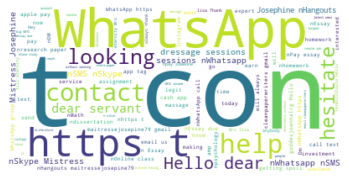

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar nube de palabras
wordcloud = WordCloud(max_words=100, background_color="white").generate(df.to_string())

# Mostrar gráfico
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [500, 500]
plt.show()

- Realizar un etiquetado POS con la función pos_tag de NLTK
- Lematizar mapeando las clasificaciones de POS con las clasificaciones permitidas por el lematizador

- Hacer nuevamente la nube de palabras

In [4]:
from nltk.tokenize import TweetTokenizer
# Instanciar Tokenizer
tt = TweetTokenizer()
# Aplicar Tokenizer a la columna
tokenized_text = df['text'].apply(tt.tokenize)
df["tokenized_text"] = tokenized_text
import nltk
all_tweets = []
for text in df["tokenized_text"]:
    all_tweets += text
text_taged = nltk.pos_tag(all_tweets)
text_taged

[('Hit', 'VB'),
 ('Me', 'NNP'),
 ('Up', 'NNP'),
 ('for', 'IN'),
 ('professional', 'JJ'),
 ('assistance', 'NN'),
 ('in', 'IN'),
 (':', ':'),
 ('Onlineclass', 'NN'),
 ('Statistics', 'NNPS'),
 ('Termpapers', 'NNPS'),
 ('Assignments', 'NNPS'),
 ('Physics', 'NNPS'),
 ('Accounting', 'NNP'),
 ('History', 'NNP'),
 ('Finance', 'NNP'),
 ('Math', 'NNP'),
 ('Biology', 'NNP'),
 ('Dissertation', 'NNP'),
 ('Research', 'NNP'),
 ('Thesis', 'NNP'),
 ('English', 'NNP'),
 ('Chemistry', 'NNP'),
 ('Literature', 'NNP'),
 ('Essay', 'NNP'),
 ('cleanpaperwriters@gmail.com', 'NN'),
 ('WhatsApp', 'NNP'),
 ('/', 'NNP'),
 ('call', 'VB'),
 ('/', 'NNP'),
 ('text', 'JJ'),
 ('+1(435)485-2832', 'JJ'),
 ('@XRPBaybeee', 'NN'),
 ('@whynotcoconut__', 'NNP'),
 ('@cryptomanran', 'NNP'),
 ('I', 'PRP'),
 ('will', 'MD'),
 ('always', 'RB'),
 ('thank', 'VB'),
 ('you', 'PRP'),
 ('till', 'VBP'),
 ('eternity', 'JJ'),
 ('Mrs', 'NNP'),
 ('lisa.Thank', 'NN'),
 ('you', 'PRP'),
 ('for', 'IN'),
 ('making', 'VBG'),
 ('me', 'PRP'),
 ('who', 

In [5]:
#N* -> N
#J* -> A
#V* -> V
#R* -> R
taged_OK = []
for i in range(len(text_taged)):
    if text_taged[i][1][0] == "N":
        text_taged[i] = (text_taged[i][0], "N")
        taged_OK.append(text_taged[i])
    elif text_taged[i][1][0] == "J":
        text_taged[i] = (text_taged[i][0], "A")
        taged_OK.append(text_taged[i])
    elif text_taged[i][1][0] == "V":
        text_taged[i] = (text_taged[i][0], "V")
        taged_OK.append(text_taged[i])
    elif text_taged[i][1][0] == "R":
        text_taged[i] = (text_taged[i][0], "R")
        taged_OK.append(text_taged[i])
taged_OK

[('Hit', 'V'),
 ('Me', 'N'),
 ('Up', 'N'),
 ('professional', 'A'),
 ('assistance', 'N'),
 ('Onlineclass', 'N'),
 ('Statistics', 'N'),
 ('Termpapers', 'N'),
 ('Assignments', 'N'),
 ('Physics', 'N'),
 ('Accounting', 'N'),
 ('History', 'N'),
 ('Finance', 'N'),
 ('Math', 'N'),
 ('Biology', 'N'),
 ('Dissertation', 'N'),
 ('Research', 'N'),
 ('Thesis', 'N'),
 ('English', 'N'),
 ('Chemistry', 'N'),
 ('Literature', 'N'),
 ('Essay', 'N'),
 ('cleanpaperwriters@gmail.com', 'N'),
 ('WhatsApp', 'N'),
 ('/', 'N'),
 ('call', 'V'),
 ('/', 'N'),
 ('text', 'A'),
 ('+1(435)485-2832', 'A'),
 ('@XRPBaybeee', 'N'),
 ('@whynotcoconut__', 'N'),
 ('@cryptomanran', 'N'),
 ('always', 'R'),
 ('thank', 'V'),
 ('till', 'V'),
 ('eternity', 'A'),
 ('Mrs', 'N'),
 ('lisa.Thank', 'N'),
 ('making', 'V'),
 ('am', 'V'),
 ('today', 'N'),
 ('services', 'N'),
 ('bitcoin', 'A'),
 ('mining.If', 'N'),
 ('want', 'V'),
 ('earn', 'V'),
 ('big', 'A'),
 ('BTC', 'N'),
 ('income', 'N'),
 ('investments', 'N'),
 ('sending', 'V'),
 ('inve

In [7]:
from nltk.stem import WordNetLemmatizer
# Importar Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = []
for word, simbol in taged_OK:
    lemmatized.append(wordnet_lemmatizer.lemmatize(word, simbol.lower()))
lemmatized

['Hit',
 'Me',
 'Up',
 'professional',
 'assistance',
 'Onlineclass',
 'Statistics',
 'Termpapers',
 'Assignments',
 'Physics',
 'Accounting',
 'History',
 'Finance',
 'Math',
 'Biology',
 'Dissertation',
 'Research',
 'Thesis',
 'English',
 'Chemistry',
 'Literature',
 'Essay',
 'cleanpaperwriters@gmail.com',
 'WhatsApp',
 '/',
 'call',
 '/',
 'text',
 '+1(435)485-2832',
 '@XRPBaybeee',
 '@whynotcoconut__',
 '@cryptomanran',
 'always',
 'thank',
 'till',
 'eternity',
 'Mrs',
 'lisa.Thank',
 'make',
 'be',
 'today',
 'service',
 'bitcoin',
 'mining.If',
 'want',
 'earn',
 'big',
 'BTC',
 'income',
 'investment',
 'send',
 'investment',
 'anybody',
 'then',
 'whatsapp',
 '+1(334) 569-5972',
 'be',
 'best',
 'essay',
 'writer',
 'Contact',
 'today',
 'assignment',
 '#writing',
 '#psychology',
 '#Accounting',
 '#essaypay',
 '#Nursing',
 '#business',
 'Auditing',
 'Humanities',
 'Timed',
 'test',
 'English',
 'Dm',
 '@essaywhip',
 'WhatsApp',
 '+1 (781) 850-7321',
 'Are',
 'pressure',
 'do

In [1]:
wordcloud = WordCloud(max_words=25, background_color="white").generate(" ".join(lemmatized))

# Mostrar gráfico
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

NameError: name 'WordCloud' is not defined

- Describir los cambios observador